In [1]:
# Input parameters.
dataFileName = "macys_chat_anonymized_0920_1020_initialQuestionsConcatenatedUpToLength10"
projectName = dataFileName
projectSuffix = "threshold0.65.dbscan-mincount5"
clustersFilePath = "%s/%s.%s.cluster.txt"%(projectName, projectName, projectSuffix)
originalDataPath = "data/%s.tsv"%(dataFileName)

# Output parameters.
numOfSamplesPerCluster = 5
outputFilePath = "%s/%s.%s.cluster.overview.txt"%(projectName, projectName, projectSuffix)

# Set to 'True' if you want to see clusters printed in this notebook.
printClusters = False

In [2]:
clustersShort = open(clustersFilePath, 'r', encoding="utf8")

originalData = list(open(originalDataPath, 'r', encoding="utf8"))

clusters = [[int(i) for i in line.split()] for line in clustersShort]
clusters.sort(key = lambda x: len(x), reverse=True)

In [3]:
print("Total num of clusters: {0}".format(len(clusters)))

Total num of clusters: 1099


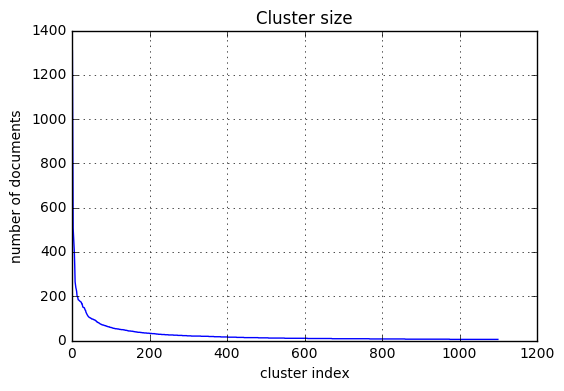

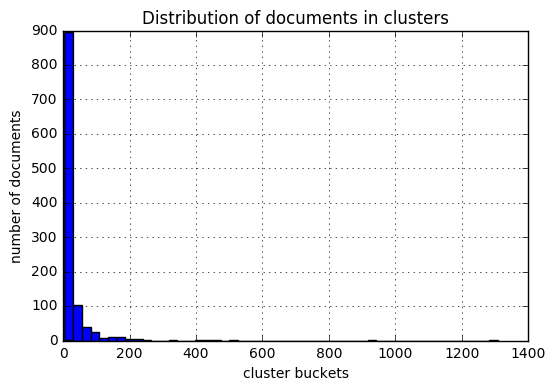

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, len(clusters) + 1), [len(x) for x in clusters])
plt.xlabel('cluster index')
plt.ylabel('number of documents')
plt.title('Cluster size')
plt.grid(True)
plt.show()

plt.hist([len(x) for x in clusters], bins=50)
plt.xlabel('cluster buckets')
plt.ylabel('number of documents')
plt.title('Distribution of documents in clusters')
plt.grid(True)
plt.show()

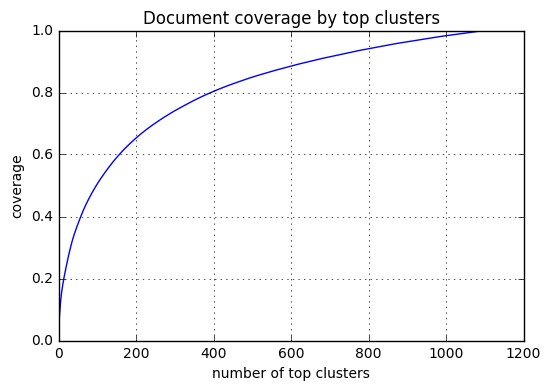

In [5]:
coverage = np.array([0 for i in range(len(clusters)+1)])
for i in range(1,len(clusters)+1):
    coverage[i] = coverage[i - 1] + len(clusters[i - 1])
totalSum = coverage[len(clusters)]
coverageRatio = coverage / totalSum

plt.plot(np.arange(0, len(clusters)+1), coverageRatio)
plt.xlabel('number of top clusters')
plt.ylabel('coverage')
plt.title('Document coverage by top clusters')
plt.grid(True)
plt.show()

In [6]:
import random

with open(outputFilePath, 'w', encoding="utf8") as outputFile:
    for i in range(len(clusters)):
        clusterTitle = "#{0}. Cluster 'unnamed'. Documents: {1}, coverage of this cluster: {2:.2f}%, coverage of all clusters up to this one: {3:.2f}%:\r\n".format(i+1, len(clusters[i]), len(clusters[i]) * 100 / totalSum, coverageRatio[i+1] * 100)
        outputFile.write(clusterTitle)
        if (printClusters):
            print(clusterTitle)
        
        rand_smpl = [clusters[i][j] for j in sorted(random.sample(range(len(clusters[i])), numOfSamplesPerCluster)) ]
        for j in rand_smpl:
            outputFile.write(originalData[j-1])
            if (printClusters):
                print(originalData[j-1])
        outputFile.write('\r\n')
        if (printClusters):
            print()